# ***Reto***

## ***Importar librerias***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go
import plotly.tools as tls
import plotly.express as px
import seaborn as sns
from numpy.linalg import eig
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
from pgmpy.metrics import correlation_score
import networkx
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from factor_analyzer.factor_analyzer import FactorAnalyzer
from factor_analyzer import factor_analyzer

## ***Analisis exploratorio***

In [ ]:
df = pd.read_excel("diabetes_cortesia_promitat.xlsx")
df.head(5)

,Unnamed: 0,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,genero,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad,diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No_diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No_diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No_diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No_diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No_diabetes


In [ ]:
for i in df.columns:
    print(f"In {i} there are {df[i].isna().sum()} na's")

In Unnamed: 0 there are 0 na's
In colesterol there are 0 na's
In glucosa there are 0 na's
In hdl_chol there are 0 na's
In prop_col_hdl there are 0 na's
In edad there are 0 na's
In genero there are 0 na's
In altura there are 0 na's
In peso there are 0 na's
In IMC there are 0 na's
In ps_sistolica there are 0 na's
In ps_diastolica there are 0 na's
In cintura there are 0 na's
In caderas there are 0 na's
In prop_cin_cad there are 0 na's
In diabetes there are 0 na's


Este pedo esta en sistema de unidades inglesa

In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1)

,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,genero,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad,diabetes
0,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No_diabetes
1,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No_diabetes
2,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No_diabetes
3,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No_diabetes
4,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No_diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,female,59,125,25.2,150,90,35,40,0.88,No_diabetes
386,226,279,52,4.3,84,female,60,192,37.5,144,88,41,48,0.85,Diabetes
387,301,90,118,2.6,89,female,61,115,21.7,218,90,31,41,0.76,No_diabetes
388,232,184,114,2.0,91,female,61,127,24.0,170,82,35,38,0.92,Diabetes


In [ ]:
df['genero'].replace(['female', 'male'], [1,0], inplace=True)

In [ ]:
df['diabetes'].replace(['No_diabetes', 'Diabetes'], [0,1], inplace=True)

In [ ]:
df_1 = df.drop(columns=['Unnamed: 0'], axis=1)

/var/folders/nv/mjpqhd9s64z2dqx5x8gq16d40000gn/T/ipykernel_6629/1853781666.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<AxesSubplot:title={'center':'colesterol'}>,
        <AxesSubplot:title={'center':'glucosa'}>,
        <AxesSubplot:title={'center':'hdl_chol'}>,
        <AxesSubplot:title={'center':'prop_col_hdl'}>],
       [<AxesSubplot:title={'center':'edad'}>,
        <AxesSubplot:title={'center':'genero'}>,
        <AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'peso'}>],
       [<AxesSubplot:title={'center':'IMC'}>,
        <AxesSubplot:title={'center':'ps_sistolica'}>,
        <AxesSubplot:title={'center':'ps_diastolica'}>,
        <AxesSubplot:title={'center':'cintura'}>],
       [<AxesSubplot:title={'center':'caderas'}>,
        <AxesSubplot:title={'center':'prop_cin_cad'}>,
        <AxesSubplot:title={'center':'diabetes'}>, <AxesSubplot:>]],
      dtype=object)

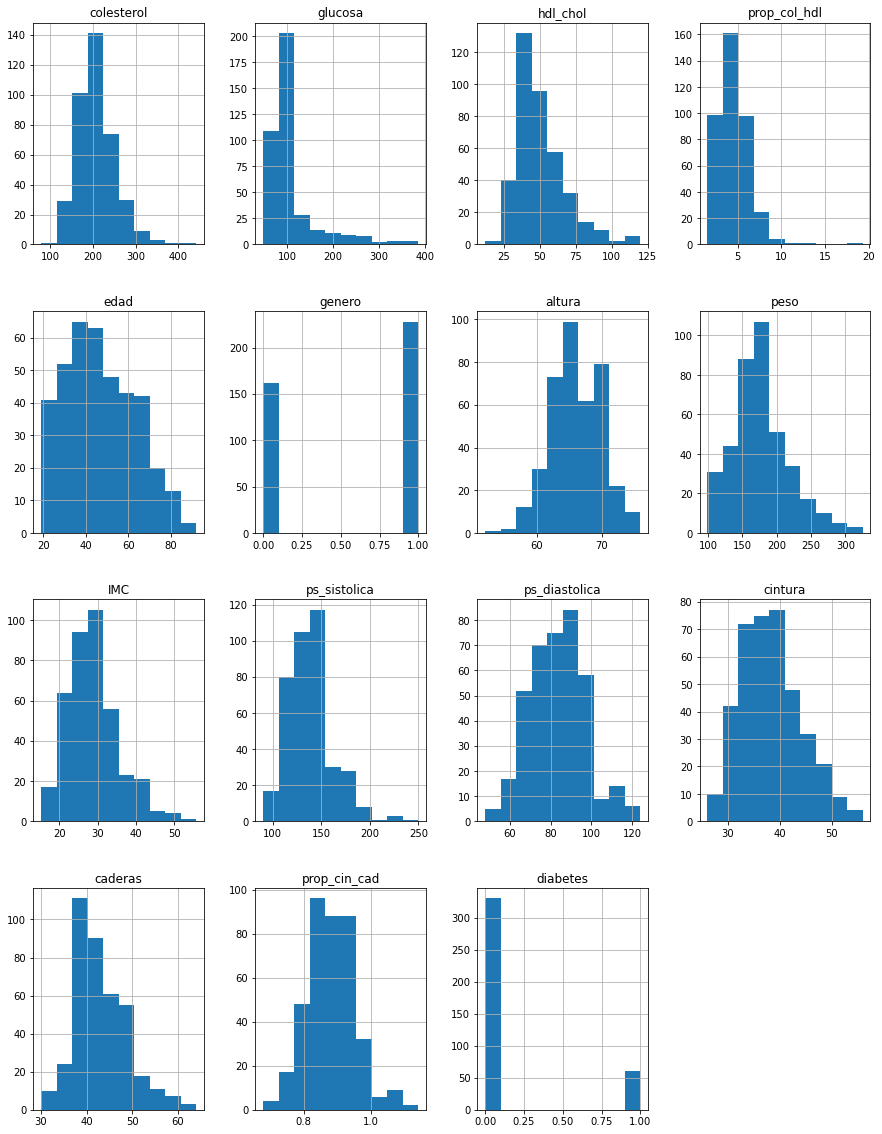

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_1.hist(ax = ax)

In [ ]:
fig = px.pie(df, values="glucosa", names="genero")
fig.show()

In [ ]:
df_1.describe()

,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,genero,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,0.584615,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.153846
std,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,1.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,0.000000
max,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


In [ ]:
df_1.corr()

,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,genero,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad,diabetes
colesterol,1.000000,0.158102,0.193162,0.475927,0.247333,0.030139,-0.063601,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364,0.091847,0.204262
glucosa,0.158102,1.000000,-0.158302,0.282210,0.294392,-0.093372,0.098052,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223,0.185117,0.689080
hdl_chol,0.193162,-0.158302,1.000000,-0.681867,0.028210,0.108305,-0.087238,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837,-0.158777,-0.123133
prop_col_hdl,0.475927,0.282210,-0.681867,1.000000,0.163201,-0.102938,0.081162,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902,0.243329,0.272987
edad,0.247333,0.294392,0.028210,0.163201,1.000000,-0.084177,-0.082229,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675,0.275188,0.301995
genero,0.030139,-0.093372,0.108305,-0.102938,-0.084177,1.000000,-0.677876,-0.092053,0.254189,-0.035417,-0.071043,0.045955,0.272028,-0.346253,-0.015531
altura,-0.063601,0.098052,-0.087238,0.081162,-0.082229,-0.677876,1.000000,0.255389,-0.259589,-0.040704,0.043617,0.057447,-0.095906,0.252548,0.023466
peso,0.062359,0.190358,-0.291883,0.278812,-0.056784,-0.092053,0.255389,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985,0.250461,0.162987
IMC,0.091695,0.129286,-0.241860,0.228407,-0.009164,0.254189,-0.259589,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728,0.100873,0.145274
ps_sistolica,0.207741,0.162777,0.031807,0.115505,0.453417,-0.035417,-0.040704,0.097497,0.121408,1.000000,0.603662,0.210934,0.155321,0.137871,0.198600


<AxesSubplot:>

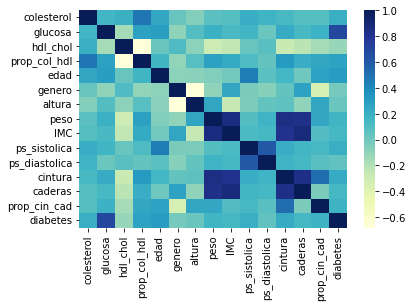

In [ ]:
sns.heatmap(df_1.corr(),cmap="YlGnBu")

## ***PCA desde 0***

In [ ]:
df.dtypes

Unnamed: 0         int64
colesterol         int64
glucosa            int64
hdl_chol           int64
prop_col_hdl     float64
edad               int64
genero             int64
altura             int64
peso               int64
IMC              float64
ps_sistolica       int64
ps_diastolica      int64
cintura            int64
caderas            int64
prop_cin_cad     float64
diabetes           int64
dtype: object

In [ ]:
newdf = df.drop(['diabetes', 'Unnamed: 0'], axis=1)

In [ ]:
features = ['colesterol', 'glucosa', 'hdl_chol', 'prop_col_hdl', 'edad', 'genero', 'altura', 'peso', 'IMC', 'ps_sistolica', 'ps_diastolica', 'cintura', 'caderas', 'prop_cin_cad']

In [ ]:
newdf

,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,genero,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad
0,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84
1,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83
2,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89
3,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79
4,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,1,59,125,25.2,150,90,35,40,0.88
386,226,279,52,4.3,84,1,60,192,37.5,144,88,41,48,0.85
387,301,90,118,2.6,89,1,61,115,21.7,218,90,31,41,0.76
388,232,184,114,2.0,91,1,61,127,24.0,170,82,35,38,0.92


In [ ]:
y = df.diabetes.values

In [ ]:
standarized_df = (newdf-newdf.mean())/newdf.std()
standarized_df

,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,genero,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad
0,-0.318604,-0.563931,-0.073306,-0.359670,-1.689858,0.841846,-1.263447,-1.445455,-0.950723,-0.836996,-0.984557,-1.018796,-0.881357,-0.565269
1,-1.370858,-0.526755,-0.536294,-0.532418,-1.689858,0.841846,-1.518623,-1.049492,-0.359896,-1.274450,-1.873565,-0.845214,-0.528271,-0.701858
2,0.218717,-0.601107,0.216061,-0.302088,-1.629016,0.841846,0.267607,0.237387,0.079437,-1.186959,-0.836389,0.369864,0.354444,0.117677
3,0.420213,-0.192171,1.142037,-0.762749,-1.629016,0.841846,-0.497920,-1.569193,-1.390056,-0.662014,-1.429061,-1.192379,-0.704814,-1.248215
4,-0.967867,-0.303699,0.968416,-1.223410,-1.629016,0.841846,1.033135,-0.901006,-1.299159,-0.662014,0.200787,-1.018796,-0.704814,-0.838447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.442601,-0.043467,-0.362674,0.388904,2.204054,0.841846,-1.773799,-1.296969,-0.541689,0.562858,0.497123,-0.498048,-0.528271,-0.018912
386,0.420213,3.190842,0.100314,-0.129340,2.264897,0.841846,-1.518623,0.361126,1.321689,0.300385,0.348955,0.543447,0.884073,-0.428680
387,2.099342,-0.322287,3.919964,-1.108245,2.569109,0.841846,-1.263447,-1.544446,-1.071918,3.537548,0.497123,-1.192379,-0.351728,-1.657983
388,0.554543,1.424984,3.688470,-1.453741,2.690793,0.841846,-1.263447,-1.247474,-0.723482,1.437767,-0.095549,-0.498048,-0.881357,0.527444


In [ ]:
X_scaled = standarized_df.to_numpy()

In [ ]:
coMatrix = pd.DataFrame(np.cov(standarized_df, bias=True, rowvar=False))
round(coMatrix,4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.9974,0.1577,0.1927,0.4747,0.2467,0.0301,-0.0634,0.0622,0.0915,0.2072,0.1658,0.1337,0.0931,0.0916
1,0.1577,0.9974,-0.1579,0.2815,0.2936,-0.0931,0.0978,0.1899,0.1290,0.1624,0.0202,0.2218,0.1379,0.1846
2,0.1927,-0.1579,0.9974,-0.6801,0.0281,0.1080,-0.0870,-0.2911,-0.2412,0.0317,0.0781,-0.2760,-0.2233,-0.1584
3,0.4747,0.2815,-0.6801,0.9974,0.1628,-0.1027,0.0810,0.2781,0.2278,0.1152,0.0381,0.3125,0.2084,0.2427
4,0.2467,0.2936,0.0281,0.1628,0.9974,-0.0840,-0.0820,-0.0566,-0.0091,0.4523,0.0685,0.1502,0.0047,0.2745
5,0.0301,-0.0931,0.1080,-0.1027,-0.0840,0.9974,-0.6761,-0.0918,0.2535,-0.0353,-0.0709,0.0458,0.2713,-0.3454
6,-0.0634,0.0978,-0.0870,0.0810,-0.0820,-0.6761,0.9974,0.2547,-0.2589,-0.0406,0.0435,0.0573,-0.0957,0.2519
7,0.0622,0.1899,-0.2911,0.2781,-0.0566,-0.0918,0.2547,0.9974,0.8579,0.0972,0.1660,0.8456,0.8249,0.2498
8,0.0915,0.1290,-0.2412,0.2278,-0.0091,0.2535,-0.2589,0.8579,0.9974,0.1211,0.1449,0.8086,0.8795,0.1006
9,0.2072,0.1624,0.0317,0.1152,0.4523,-0.0353,-0.0406,0.0972,0.1211,0.9974,0.6021,0.2104,0.1549,0.1375


In [ ]:
coMatrix_1 = coMatrix.to_numpy()

In [ ]:
w,v = eig(coMatrix_1)


print('E-value: ', w)
print('E-vector: ', v)

E-value:  [4.07533498e+00 2.27001689e+00 1.90102021e+00 1.47892233e+00
 1.05840423e+00 9.73266762e-01 8.24493089e-01 5.91147380e-01
 3.35495044e-01 2.60850351e-01 1.20842459e-01 6.62383799e-02
 1.99377577e-03 6.07669223e-03]
E-vector:  [[ 1.18911269e-01  1.46872500e-01 -3.52387140e-01 -2.52371762e-01
  -6.51612421e-02  7.42019709e-01  7.56747648e-02 -1.22857588e-02
   2.27731788e-02 -6.17171037e-02 -6.61715483e-02  4.54959015e-01
  -2.68884146e-03  1.51729327e-03]
 [ 1.66169296e-01  2.24032049e-01 -8.54230257e-02 -2.27127398e-01
   2.89043540e-01 -9.90542755e-02 -7.44451120e-01  4.59149712e-01
   5.14851932e-02 -3.08826311e-02 -2.92462940e-02  2.02144307e-02
  -1.33448232e-03  7.70723298e-03]
 [-2.07953014e-01 -1.10958328e-01 -3.13646541e-01  4.06993166e-01
   3.66034638e-01  4.42208835e-01 -6.78719127e-02  5.43254083e-02
   2.57616508e-03 -4.99209241e-02  8.21378966e-02 -5.78005390e-01
  -1.63775636e-03  2.55656797e-04]
 [ 2.53157266e-01  2.40558569e-01  3.81629443e-02 -5.35046673e-01

In [ ]:
s = np.sum(w)
s

13.96410256410256

In [ ]:
vector_length = len(v)
print(vector_length)

14


In [ ]:
variance_explained = []
for i in w:
    variance_explained.append((i/sum(w))*100)

print(variance_explained)

variance_component = w/(w.sum())
variance_component

[29.184367264820477, 16.25608860334383, 13.613622527587665, 10.590887032303819, 7.5794647279245355, 6.969776665105042, 5.9043757714874925, 4.233335996069452, 2.402553564154165, 1.8680065505358316, 0.8653793452664529, 0.4743475606865308, 0.014277865393416828, 0.043516525321307425]


array([2.91843673e-01, 1.62560886e-01, 1.36136225e-01, 1.05908870e-01,
       7.57946473e-02, 6.96977667e-02, 5.90437577e-02, 4.23333600e-02,
       2.40255356e-02, 1.86800655e-02, 8.65379345e-03, 4.74347561e-03,
       1.42778654e-04, 4.35165253e-04])

In [ ]:
variance_explained_sort = variance_explained

In [ ]:
variance_explained_sort.sort(reverse = True)
variance_explained_sort[0]+variance_explained_sort[1]+variance_explained_sort[2]

59.05407839575197

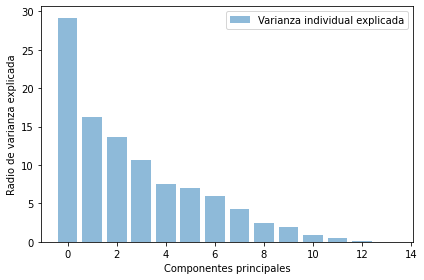

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(6,4))

plt.bar(range(14), variance_explained, alpha=0.5, align='center', label='Varianza individual explicada')
plt.ylabel('Radio de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend()
plt.tight_layout()

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 29.18436726  45.44045587  59.0540784   69.64496543  77.22443016
  84.19420682  90.09858259  94.33191859  96.73447215  98.6024787
  99.46785805  99.94220561  99.98572213 100.        ]


Text(0.5, 1.0, 'Varianza extendida vs Numero de componentes')

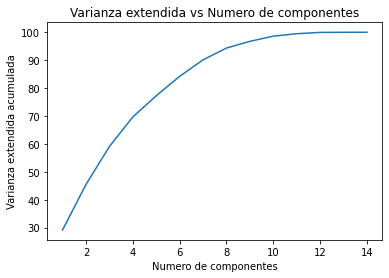

In [ ]:
sns.lineplot(x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], y=cumulative_variance_explained)
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza extendida acumulada")
plt.title("Varianza extendida vs Numero de componentes")

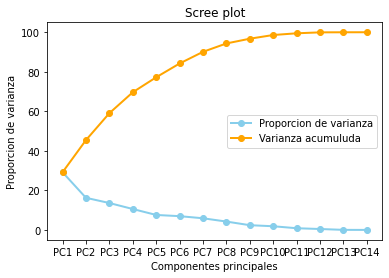

In [ ]:
x_labels = ['PC{}'.format(i+1) for i in range(len(variance_explained))]
plt.plot(x_labels, variance_explained, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proporcion de varianza')
plt.plot(x_labels, cumulative_variance_explained, marker='o', markersize=6, color='orange', linewidth=2, label='Varianza acumuluda')
plt.legend()
plt.title('Scree plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporcion de varianza')
plt.show()

In [ ]:
projection_matrix = (v.T[:][:2]).T
print(projection_matrix)

[[ 0.11891127  0.1468725 ]
 [ 0.1661693   0.22403205]
 [-0.20795301 -0.11095833]
 [ 0.25315727  0.24055857]
 [ 0.09177001  0.26994755]
 [ 0.01389439 -0.5078339 ]
 [ 0.02079088  0.42106135]
 [ 0.44046977 -0.06079542]
 [ 0.42727354 -0.28273745]
 [ 0.15441133  0.19392963]
 [ 0.13056151  0.11913774]
 [ 0.46197086 -0.0333551 ]
 [ 0.42075727 -0.27560329]
 [ 0.18425132  0.37079582]]


In [ ]:
X_pca = standarized_df.dot(projection_matrix)
print(X_pca)

            0         1
0   -2.623380 -1.522847
1   -2.248262 -2.302314
2   -0.139811 -1.386888
3   -3.212005 -1.407491
4   -2.742639 -0.809227
..        ...       ...
385 -0.710386  0.165226
386  2.074340 -0.437775
387 -2.209915 -0.067235
388 -1.752766  0.411509
389  2.781446 -0.928058

[390 rows x 2 columns]


In [ ]:
X_pca.rename(columns={0: "PC1", 1: "PC2"})

,PC1,PC2
0,-2.623380,-1.522847
1,-2.248262,-2.302314
2,-0.139811,-1.386888
3,-3.212005,-1.407491
4,-2.742639,-0.809227
...,...,...
385,-0.710386,0.165226
386,2.074340,-0.437775
387,-2.209915,-0.067235
388,-1.752766,0.411509


In [ ]:
X_pca_pd = pd.DataFrame(X_pca)
X_pca_pd

,0,1
0,-2.623380,-1.522847
1,-2.248262,-2.302314
2,-0.139811,-1.386888
3,-3.212005,-1.407491
4,-2.742639,-0.809227
...,...,...
385,-0.710386,0.165226
386,2.074340,-0.437775
387,-2.209915,-0.067235
388,-1.752766,0.411509


In [ ]:
fig = px.scatter(X_pca_pd, x=0, y=1, color=df['diabetes'])
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=projection_matrix[i, 0],
        y1=projection_matrix[i, 1]
    )
    fig.add_annotation(
        x=projection_matrix[i, 0],
        y=projection_matrix[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

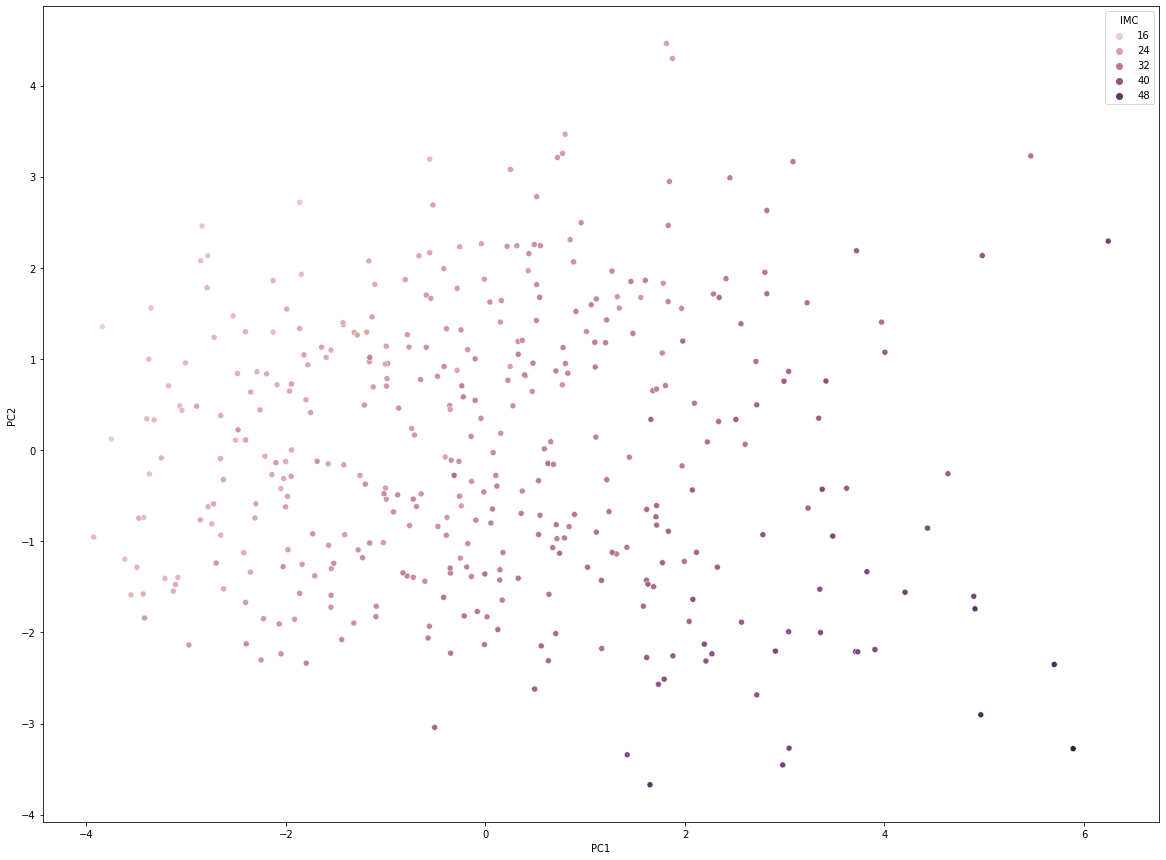

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=X_pca_pd[0], y = X_pca_pd[1], hue=df['IMC'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## ***Analisis Factorial***

In [ ]:
df_f = df.drop(columns=["diabetes", "genero", "Unnamed: 0"])

In [ ]:
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax')
fa.fit(df_f)
print(pd.DataFrame(fa.loadings_, index=df_f.columns))

                      0         1         2         3         4         5
colesterol     0.044241 -0.024177  0.130553  0.151652  0.853667 -0.052132
glucosa        0.106985  0.160620  0.077561  0.301844  0.139137  0.033801
hdl_chol      -0.176933 -0.945373  0.072375 -0.082426  0.210725 -0.041953
prop_col_hdl   0.140201  0.791247  0.009548  0.218752  0.531458  0.060143
edad          -0.074260  0.008598  0.264070  0.520407  0.153604 -0.185206
altura        -0.044039  0.052895  0.016595  0.093618 -0.033231  0.816846
peso           0.927123  0.129764  0.069356  0.070300  0.029294  0.324515
IMC            0.946626  0.102703  0.054018  0.023476  0.036701 -0.237711
ps_sistolica   0.039751  0.024778  0.966754  0.266071  0.050243 -0.102490
ps_diastolica  0.124826 -0.049629  0.596078  0.004449  0.078927  0.082403
cintura        0.873295  0.088802  0.057283  0.473050  0.015989  0.070815
caderas        0.915977  0.095725  0.119813 -0.061206  0.056600 -0.102905
prop_cin_cad   0.121168  0.065342 -0.0

In [ ]:
loadings = fa.loadings_

In [ ]:
ev, v = fa.get_eigenvalues()

In [ ]:
xvals = range(1, df_f.shape[1]+1)

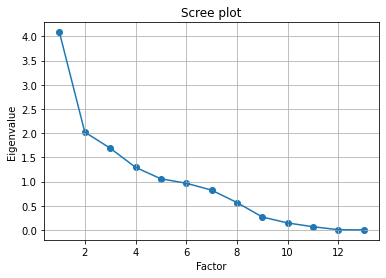

In [ ]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title("Scree plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

In [ ]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.044241,-0.024177,0.130553,0.151652,0.853667,-0.052132
1,0.106985,0.160620,0.077561,0.301844,0.139137,0.033801
2,-0.176933,-0.945373,0.072375,-0.082426,0.210725,-0.041953
3,0.140201,0.791247,0.009548,0.218752,0.531458,0.060143
4,-0.074260,0.008598,0.264070,0.520407,0.153604,-0.185206
5,-0.044039,0.052895,0.016595,0.093618,-0.033231,0.816846
6,0.927123,0.129764,0.069356,0.070300,0.029294,0.324515
7,0.946626,0.102703,0.054018,0.023476,0.036701,-0.237711
8,0.039751,0.024778,0.966754,0.266071,0.050243,-0.102490
9,0.124826,-0.049629,0.596078,0.004449,0.078927,0.082403


## ***PCA usando sklearn***

In [ ]:
features_1 = ['colesterol', 'glucosa', 'hdl_chol', 'prop_col_hdl', 'edad', 'genero', 'altura', 'peso', 'IMC', 'ps_sistolica', 'ps_diastolica', 'cintura', 'caderas', 'prop_cin_cad']
X_1 = df[features]

pca = PCA(n_components=2)
componentes = pca.fit_transform(X_1)

loadings_1 = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(componentes, x=0, y=1, color=df['diabetes'])
for i, feature in enumerate(features_1):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings_1[i, 0],
        y1=loadings_1[i, 1]
    )
    fig.add_annotation(
        x=loadings_1[i, 0],
        y=loadings_1[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()



## ***Red Bayesiana***

In [ ]:
df_b = df

In [ ]:
df_b['diabetes'].replace(['No_diabetes', 'Diabetes'], [0,1], inplace=True)

In [ ]:
df_b.head(5)

,Unnamed: 0,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,genero,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad,diabetes
0,1,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82,0


In [ ]:
model_1 = BayesianModel([("colesterol", "diabetes"), ("glucosa", "diabetes")])

/Users/davogonzalez/opt/miniconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning:

BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.



In [ ]:
model_1.fit(df_b, estimator=MaximumLikelihoodEstimator)

In [ ]:
print(model_1.get_cpds('glucosa'))

+--------------+------------+
| glucosa(48)  | 0.0025641  |
+--------------+------------+
| glucosa(52)  | 0.0025641  |
+--------------+------------+
| glucosa(54)  | 0.0025641  |
+--------------+------------+
| glucosa(56)  | 0.00512821 |
+--------------+------------+
| glucosa(57)  | 0.0025641  |
+--------------+------------+
| glucosa(58)  | 0.0025641  |
+--------------+------------+
| glucosa(59)  | 0.0025641  |
+--------------+------------+
| glucosa(60)  | 0.0025641  |
+--------------+------------+
| glucosa(62)  | 0.0025641  |
+--------------+------------+
| glucosa(64)  | 0.00512821 |
+--------------+------------+
| glucosa(65)  | 0.00512821 |
+--------------+------------+
| glucosa(66)  | 0.0025641  |
+--------------+------------+
| glucosa(67)  | 0.0102564  |
+--------------+------------+
| glucosa(68)  | 0.00512821 |
+--------------+------------+
| glucosa(69)  | 0.0102564  |
+--------------+------------+
| glucosa(70)  | 0.00769231 |
+--------------+------------+
| glucosa(

In [ ]:
first_network_infer = VariableElimination(model_1)

In [ ]:
q1 = first_network_infer.query(variables=['diabetes'], evidence={'glucosa': 70})
print(q1)







Eliminating: colesterol: 100%|██████████| 1/1 [00:00<00:00, 673.57it/s]

+-------------+-----------------+
| diabetes    |   phi(diabetes) |
+=============+=================+
| diabetes(0) |          0.5205 |
+-------------+-----------------+
| diabetes(1) |          0.4795 |
+-------------+-----------------+


In [ ]:
model_2 = BayesianModel([("hdl_chol", "diabetes"), ("prop_col_hdl", "diabetes")])

/Users/davogonzalez/opt/miniconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning:

BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.



In [ ]:
model_2.fit(df_b, estimator=MaximumLikelihoodEstimator)

In [ ]:
second_network_infer = VariableElimination(model_2)

In [ ]:
q2 = second_network_infer.query(variables=['diabetes'], evidence={'hdl_chol': 36})
print(q2)

Eliminating: prop_col_hdl: 100%|██████████| 1/1 [00:00<00:00, 304.69it/s]

+-------------+-----------------+
| diabetes    |   phi(diabetes) |
+=============+=================+
| diabetes(0) |          0.5872 |
+-------------+-----------------+
| diabetes(1) |          0.4128 |
+-------------+-----------------+


In [ ]:
model_3 = BayesianModel([("ps_sistolica", "diabetes"), ("ps_diastolica", "diabetes"), ("cintura", "diabetes"), ("caderas", "diabetes"), 
("prop_cin_cad", "diabetes")])

/Users/davogonzalez/opt/miniconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning:

BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.



In [ ]:
model = BayesianModel([("colesterol", "diabetes"), ("glucosa", "diabetes"), ("hdl_chol", "diabetes"), ("prop_col_hdl", "diabetes"), ("edad", "diabetes"), ("genero", "diabetes"), ("altura", "diabetes"),
("peso", "diabetes"), ("IMC", "diabetes"), ("ps_sistolica", "diabetes"), ("ps_diastolica", "diabetes"), ("cintura", "diabetes"), ("caderas", "diabetes"), 
("prop_cin_cad", "diabetes")])

/Users/davogonzalez/opt/miniconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
model_1 = BayesianModel([("colesterol", "diabetes"), ("glucosa", "diabetes")])

In [ ]:
model_1.fit(df, estimator=MaximumLikelihoodEstimator)

In [ ]:
first_network_infer = VariableElimination(model_1)

In [ ]:
q1 = first_network_infer.query(variables=['diabetes'], evidence={'colesterol': 179})
print(q1)



Eliminating: glucosa: 100%|██████████| 1/1 [00:00<00:00, 580.45it/s]

+-------------+-----------------+
| diabetes    |   phi(diabetes) |
+=============+=================+
| diabetes(0) |          0.5962 |
+-------------+-----------------+
| diabetes(1) |          0.4038 |
+-------------+-----------------+


In [ ]:
second_network_infer = VariableElimination(model_1)

In [ ]:
q2 = second_network_infer.query(variables=['diabetes'], evidence={'colesterol': 220})
print(q2)


0it [00:00, ?it/s]

+-----------------------+-----------------+
| diabetes              |   phi(diabetes) |
+=======================+=================+
| diabetes(Diabetes)    |          0.5000 |
+-----------------------+-----------------+
| diabetes(No_diabetes) |          0.5000 |
+-----------------------+-----------------+


In [ ]:
model_3 = model_3 = BayesianModel([("IMC", "diabetes"), ("prop_cin_cad", "diabetes"), ("prop_col_hdl", "diabetes")])

/Users/davogonzalez/opt/miniconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning:

BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.



In [ ]:
model_3.fit(df_b, estimator=MaximumLikelihoodEstimator)

In [ ]:
third_network_infer = VariableElimination(model_3)

In [ ]:
q3 = third_network_infer.query(variables=['diabetes'], evidence={'prop_cin_cad': 1.02})
print(q3)

Eliminating: prop_col_hdl: 100%|██████████| 2/2 [00:00<00:00, 609.19it/s]

+-------------+-----------------+
| diabetes    |   phi(diabetes) |
+=============+=================+
| diabetes(0) |          0.5001 |
+-------------+-----------------+
| diabetes(1) |          0.4999 |
+-------------+-----------------+
